In [1]:
import pandas as pd # type: ignore
import talib # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pynance as pn # type: ignore
import numpy as np # type: ignore

def load_data(filepath):
    data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
    return data

filepath = 'C:/Users/nejat/AIM Projects/week1 data/yfinance_data/AMZN_historical_data.csv'
data = load_data(filepath)

print("Initial data:")
print(data.head())

Initial data:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

            Dividends  Stock Splits  
Date                                 
1997-05-15        0.0           0.0  
1997-05-16        0.0           0.0  
1997-05-19        0.0           0.0  
1997-05-20        0.0           0.0  
1997-05-21        0.0           0.0  


In [2]:
def calculate_moving_averages(data, short_period=20, long_period=50):
    data['SMA_' + str(short_period)] = talib.SMA(data['Close'], timeperiod=short_period)
    data['SMA_' + str(long_period)] = talib.SMA(data['Close'], timeperiod=long_period)
    return data

def calculate_rsi(data, period=14):
    data['RSI'] = talib.RSI(data['Close'], timeperiod=period)
    return data

def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
    data['MACD'] = macd
    data['MACD_Signal'] = macd_signal
    data['MACD_Hist'] = macd_hist
    return data

data = calculate_moving_averages(data)
data = calculate_rsi(data)
data = calculate_macd(data)

data.dropna(inplace=True)

print("Updated data:")
print(data.head())

Updated data:
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1997-07-25  0.110938  0.112500  0.110938  0.111458   0.111458  12408000   
1997-07-28  0.111458  0.119792  0.110938  0.116146   0.116146  51480000   
1997-07-29  0.118229  0.125000  0.116667  0.123958   0.123958  96288000   
1997-07-30  0.125000  0.125260  0.121354  0.122396   0.122396  50352000   
1997-07-31  0.121875  0.121875  0.116667  0.119792   0.119792  29088000   

            Dividends  Stock Splits    SMA_20    SMA_50        RSI      MACD  \
Date                                                                           
1997-07-25        0.0           0.0  0.104766  0.088641  56.916531  0.007656   
1997-07-28        0.0           0.0  0.106849  0.089005  59.898685  0.007617   
1997-07-29        0.0           0.0  0.109193  0.089755  64.329543  0.008122   
1997-07-30        0.0           0.0  0.111523  0.090495  62.

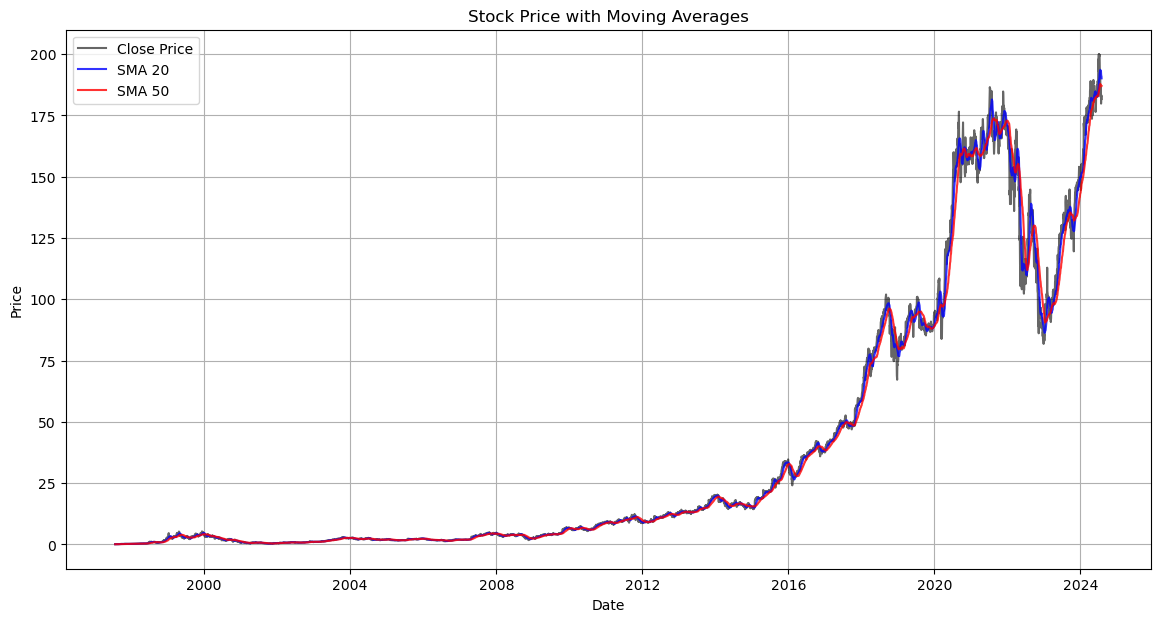

In [3]:
def plot_moving_averages(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue', alpha=0.8)
    plt.plot(data.index, data['SMA_50'], label='SMA 50', color='red', alpha=0.8)
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_moving_averages(data)


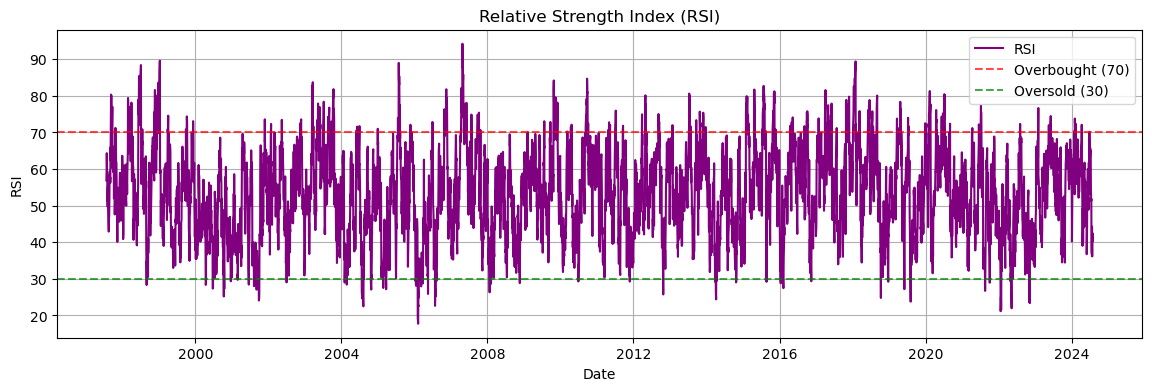

In [4]:
def plot_rsi(data):
    plt.figure(figsize=(14, 4))
    plt.plot(data.index, data['RSI'], label='RSI', color='purple')

    plt.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')


    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rsi(data)


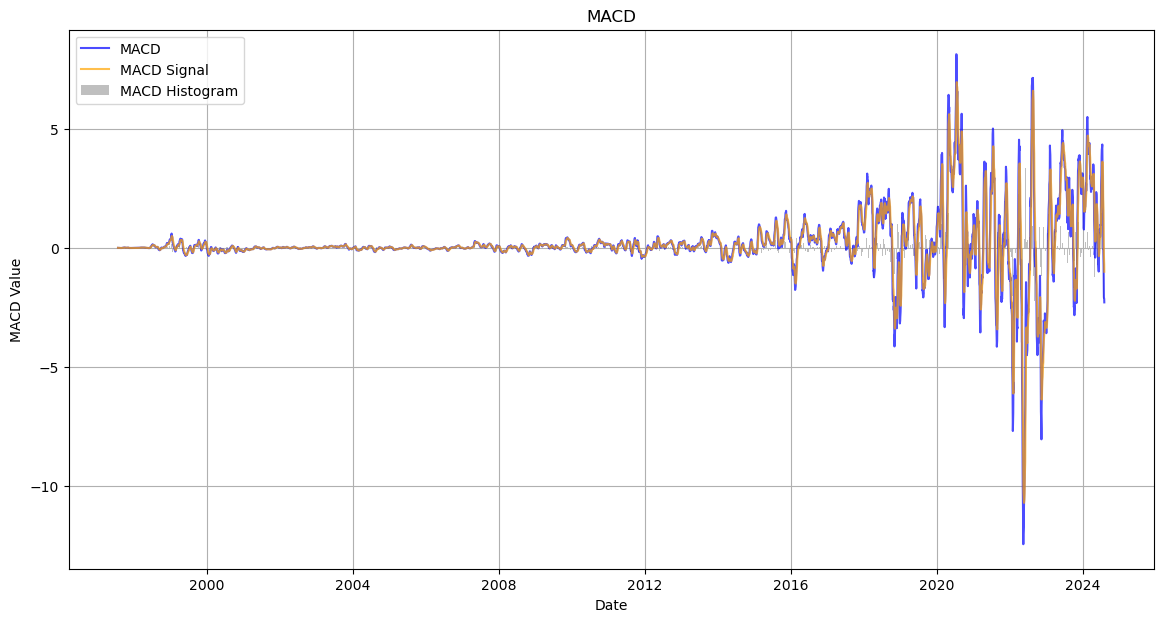

In [5]:
def plot_macd(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['MACD'], label='MACD', color='blue', alpha=0.7)
    plt.plot(data.index, data['MACD_Signal'], label='MACD Signal', color='orange', alpha=0.7)
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_macd(data)


In [6]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['Previous_Close'] = data['Close'].shift(1)
    data['TR1'] = data['High'] - data['Low']
    data['TR2'] = abs(data['High'] - data['Previous_Close'])
    data['TR3'] = abs(data['Low'] - data['Previous_Close'])
    data['TR'] = data[['TR1', 'TR2', 'TR3']].max(axis=1)

    data['ATR'] = data['TR'].rolling(window=period, min_periods=1).mean()

    data.drop(['Previous_Close', 'TR1', 'TR2', 'TR3', 'TR'], axis=1, inplace=True)
    return data

# Example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=100),
    'Close': np.random.rand(100),
    'High': np.random.rand(100) + 0.5,
    'Low': np.random.rand(100) - 0.5,
    'Volume': np.random.randint(1000, 5000, size=100)
})

data.set_index('Date', inplace=True)

data = calculate_atr(data)
print(data.head())


               Close      High       Low  Volume       ATR
Date                                                      
2020-01-01  0.154664  0.939050 -0.485631    2278  1.424682
2020-01-02  0.023172  1.061447 -0.124215    1933  1.305172
2020-01-03  0.218234  1.085992 -0.195240    4097  1.297192
2020-01-04  0.086525  1.005047  0.432629    4224  1.169597
2020-01-05  0.033431  1.289501  0.336349    3593  1.176273
